In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Model libriaries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB



Examining the Data

In [119]:
# Read the data
data = pd.read_csv("star_classification.csv")

In [5]:
data.shape

(100000, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
data["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [120]:
# Replace class label "QSO" to "QUASARS"
data['class'].replace("QSO","QUASARS",inplace=True)

C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


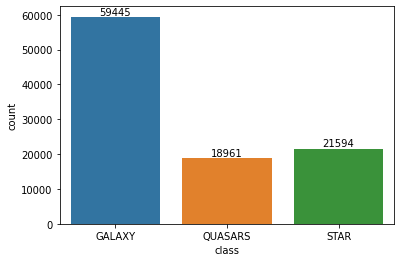

In [121]:
plot = sns.countplot(data["class"], label="Count")
plot.bar_label(plot.containers[0])
plt.show()

Preprocessing Data

In [122]:
print(data["class"].value_counts())
# Get class count
galaxy_count, star_count, qso_count = data["class"].value_counts()

# divide by classs
galaxy_class = data[data["class"] == "GALAXY"]
star_class = data[data["class"] == "STAR"]
qso_class = data[data["class"] == "QUASARS"]

# Under sampling the Galaxy class because the dataset is too imbalanced
galaxy_class_under = galaxy_class.sample(star_count)

# Concat all the data
data = pd.concat([galaxy_class_under, star_class, qso_class],axis=0)

data.shape

GALAXY     59445
STAR       21594
QUASARS    18961
Name: class, dtype: int64


(62149, 18)

C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


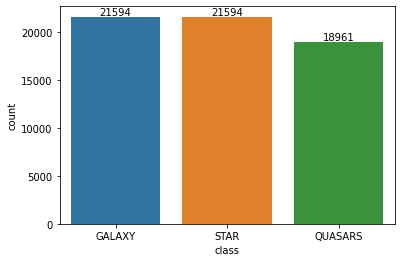

In [123]:
plot = sns.countplot(data["class"], label="Count")
plot.bar_label(plot.containers[0])
plt.show()

In [124]:
# Dropping columns that are IDs or timestamp
data = data.drop(['obj_ID','field_ID','run_ID','rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'alpha', 'delta', 'plate'], axis=1) 

In [125]:
# Finding duplicate
duplicate = data[data.duplicated()]
duplicate

,u,g,r,i,z,class,redshift


<AxesSubplot:>

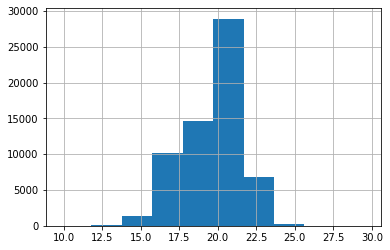

In [44]:
data["r"].hist(bins=10)

<AxesSubplot:>

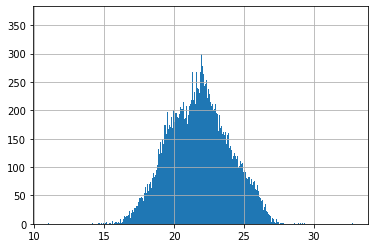

In [55]:
data = data[data["u"] != -9999]
data["u"].hist(bins=1000)

<AxesSubplot:>

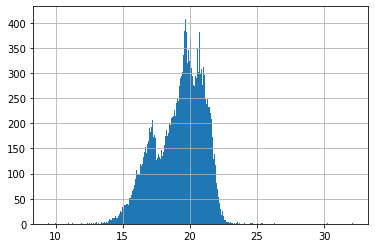

In [50]:
data["i"].hist(bins=1000)

In [14]:
# Replace class label "QSO" to "QUASARS"
data['class'].replace("QSO","QUASARS",inplace=True)

In [126]:
# Extract data label
classData = data["class"]

# Drop the class label
data.drop(["class"],axis=1, inplace=True)

In [127]:
#Scale the data
'''
NOTE: You can make this optional, scaling helped improve the accuracy. Try with scaling and without it
'''
data = scale(data)

Data Splitting

In [16]:
def split_data(train_size, data, label):
    # Train-Test datasplit
    dataTrain, dataTest, classTrain, classTest = train_test_split(data, label, train_size=train_size, random_state=1, stratify=label)

    
    print("Train: ", dataTrain.shape[0])  
    print(classTrain.value_counts())
    print("Test: ", dataTest.shape[0])  
    print(classTest.value_counts())
    print("Dataset Size: ", data.shape[0])  
    
    return (dataTrain, dataTest, classTrain, classTest)

In [128]:
# Split the data
dataTrain, dataTest, classTrain, classTest = split_data(train_size=0.7, data=data, label=classData)

Train:  43504
GALAXY     15116
STAR       15116
QUASARS    13272
Name: class, dtype: int64
Test:  18645
STAR       6478
GALAXY     6478
QUASARS    5689
Name: class, dtype: int64
Dataset Size:  62149


<Figure size 720x504 with 0 Axes>

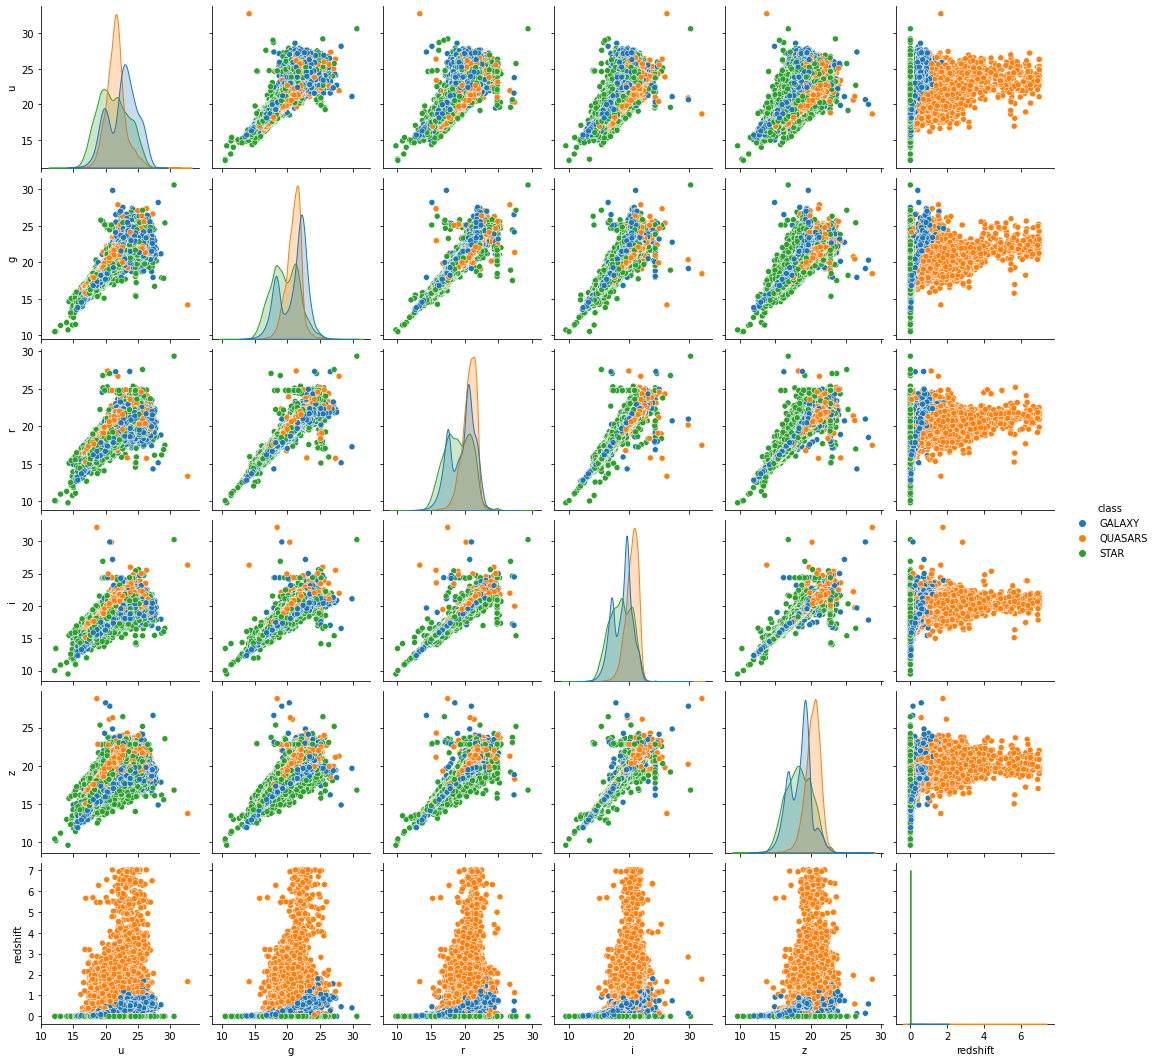

In [52]:
# Combining the dataset
df_train = pd.concat([dataTrain, classTrain], axis=1)

fig = plt.figure(figsize=(10, 7))
sns.pairplot(df_train, hue="class")
plt.show()

'''
This dataset doesn't seem to be linearly seperable
'''

Helper Methods

In [18]:
def predict(model, data, label):
    predict = model.predict(data)
    accuracy = accuracy_score(label, predict)
    
    return accuracy

In [19]:
def generate_classification_report(model, data, label):
    predict = model.predict(data)
    
    print(classification_report(label,predict))

In [20]:
def confusion_matrix(model, data, label):
    predict = model.predict(data)
    return confusion_matrix(label, predict)

Neural Network

In [21]:
def NeuralNetwork(data, classData, iteration=200, hidden_layers=1, layer_size=100):
    clf = MLPClassifier(hidden_layer_sizes=(layer_size,hidden_layers),max_iter=iteration)
    clf = clf.fit(data, classData)
    
    return clf


In [23]:
# Training the model and predicting on test data
NNModel = NeuralNetwork(dataTrain, classTrain, iteration=1000, hidden_layers=1, layer_size=50)
accuracy = predict(NNModel, dataTest, classTest)

print(accuracy)

0.9721641190667739


0.9721641190667739


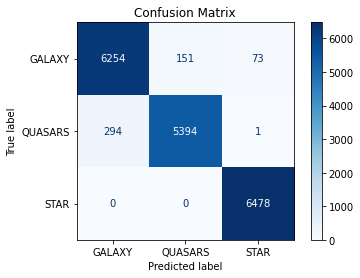

In [24]:
# predicting on validation data
accuracy = predict(NNModel, dataTest, classTest)
print(accuracy)

dsp = ConfusionMatrixDisplay.from_estimator(
    NNModel,
    dataTest,
    classTest,
    display_labels=['GALAXY', 'QUASARS', 'STAR'],
    cmap=plt.cm.Blues
)

dsp.ax_.set_title("Confusion Matrix")
plt.show()

In [25]:
# Test Accuracy vs Iterations
testAcc = []
trainAcc = []

for iteration in range(100, 1001, 100):
    NNModel = NeuralNetwork(dataTrain, classTrain, iteration=iteration, layer_size=32)
    
    # Training Accuracy
    accuracy = predict(NNModel, dataTrain, classTrain)
    trainAcc.append(accuracy)
    
    # Test Accuracy
    accuracy = predict(NNModel, dataTest, classTest)
    testAcc.append(accuracy)
    
    print("Iteration ", iteration, "/1000")



Iteration  100 /1000


C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration  200 /1000
Iteration  300 /1000
Iteration  400 /1000
Iteration  500 /1000
Iteration  600 /1000
Iteration  700 /1000
Iteration  800 /1000
Iteration  900 /1000
Iteration  1000 /1000


Text(0, 0.5, 'Accuracy')

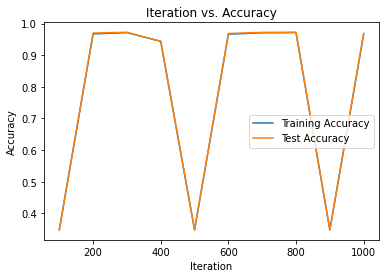

In [31]:
iteration = list(range(100,1001,100))

accMax = max(testAcc)
accXPos = testAcc.index(accMax) * 100 + 100


plt.plot(iteration,trainAcc,'-',iteration,testAcc,'-')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.title("Iteration vs. Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')


In [27]:
print(trainAcc)
print(testAcc)

[0.3474623023170283, 0.9674742552408974, 0.9715198602427363, 0.943890216991541, 0.3474623023170283, 0.9665088267745494, 0.9710141596175065, 0.9715658330268481, 0.3474623023170283, 0.9662559764619345]
[0.3474389916867793, 0.9702869401984446, 0.9725395548404397, 0.9441137034057389, 0.3474389916867793, 0.968946098149638, 0.9723250201126308, 0.9727540895682488, 0.3474389916867793, 0.9692679002413516]


K-Nearest Neighbour

In [53]:
# Test Accuracy vs Iterations
testAcc = []
trainAcc = []
validAcc = []

for k in range(1,31):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN = KNN.fit(dataTrain, classTrain)
    
    # Training Accuracy
    accuracy = predict(KNN, dataTrain, classTrain)
    trainAcc.append(accuracy)
    
    # Test Accuracy
    accuracy = predict(KNN, dataTest, classTest)
    testAcc.append(accuracy)
    
    print("Completed ", k, "/30")

Completed  1 /30
Completed  2 /30
Completed  3 /30
Completed  4 /30
Completed  5 /30
Completed  6 /30
Completed  7 /30
Completed  8 /30
Completed  9 /30
Completed  10 /30
Completed  11 /30
Completed  12 /30
Completed  13 /30
Completed  14 /30
Completed  15 /30
Completed  16 /30
Completed  17 /30
Completed  18 /30
Completed  19 /30
Completed  20 /30
Completed  21 /30
Completed  22 /30
Completed  23 /30
Completed  24 /30
Completed  25 /30
Completed  26 /30
Completed  27 /30
Completed  28 /30
Completed  29 /30
Completed  30 /30


In [58]:
KNN = KNeighborsClassifier(n_neighbors=16)
KNN = KNN.fit(dataTrain, classTrain)

print(predict(KNN, dataTest, classTest))
generate_classification_report(KNN, dataTest, classTest)

0.9429337624027889
              precision    recall  f1-score   support

      GALAXY       0.92      0.92      0.92      6478
     QUASARS       0.97      0.93      0.95      5689
        STAR       0.94      0.97      0.95      6478

    accuracy                           0.94     18645
   macro avg       0.94      0.94      0.94     18645
weighted avg       0.94      0.94      0.94     18645



In [65]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN = KNN.fit(dataTrain, classTrain)

print(predict(KNN, dataTest, classTest))
generate_classification_report(KNN, dataTest, classTest)

0.9506570126039152
              precision    recall  f1-score   support

      GALAXY       0.94      0.93      0.93      6478
     QUASARS       0.97      0.94      0.95      5689
        STAR       0.95      0.98      0.97      6478

    accuracy                           0.95     18645
   macro avg       0.95      0.95      0.95     18645
weighted avg       0.95      0.95      0.95     18645



Text(0, 0.5, 'Accuracy')

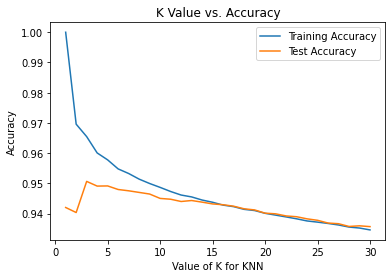

In [62]:
k = list(range(1,31))

plt.plot(k,trainAcc,'-',k,testAcc,'-')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.title("K Value vs. Accuracy")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

In [55]:
print(testAcc, "\n")
print(trainAcc)

[0.9420219898096004, 0.9403593456690802, 0.9506570126039152, 0.9491016358272996, 0.9491552695092518, 0.947975328506302, 0.9475462590506838, 0.9470099222311612, 0.9464735854116385, 0.9450254759989273, 0.944757307589166, 0.9440064360418343, 0.9443282381335478, 0.9437919013140252, 0.9432019308125503, 0.9429337624027889, 0.9424510592652185, 0.9415929203539823, 0.9412174845803164, 0.9401448109412711, 0.939930276213462, 0.9392330383480826, 0.9389648699383213, 0.9382676320729418, 0.9377849289353715, 0.9368731563421829, 0.9366586216143739, 0.9357468490211853, 0.9359613837489944, 0.935693215339233] 

[1.0, 0.9695890033100405, 0.9654744391320338, 0.9600726369988967, 0.9577739977933064, 0.954785766826039, 0.9532686649503493, 0.9514067671938212, 0.9499586244942994, 0.9486713865391688, 0.9473151894078705, 0.9461428834130194, 0.9455222508275101, 0.9444878631849944, 0.9437522986392056, 0.9428098565649136, 0.9423041559396838, 0.9414076866495035, 0.9410169179845531, 0.940097462302317, 0.939499816108863

Naive Bayes (Categorical)

In [26]:
scaler = MinMaxScaler()

scaleDataTrain = scaler.fit_transform(dataTrain)
scaleDataTest = scaler.fit_transform(dataTest)



In [114]:
modelName = ["GussianNB", "MultinomialNB", "ComplementNB", "BernoulliNB", "CategoricalNB"]
modelAccuracy = []

In [106]:
gaussian  = GaussianNB()
gaussian.fit(scaleDataTrain, classTrain)

acc = round(predict(gaussian, scaleDataTest, classTest),3)
modelAccuracy.append(acc)

In [107]:
multi = MultinomialNB()
multi.fit(scaleDataTrain, classTrain)

acc = round(predict(multi, scaleDataTest, classTest),3)
modelAccuracy.append(acc)

In [108]:
complement = ComplementNB()
complement.fit(scaleDataTrain, classTrain)

acc = round(predict(complement, scaleDataTest, classTest),3)
modelAccuracy.append(acc)

In [109]:
bernoulli = BernoulliNB()
bernoulli.fit(scaleDataTrain, classTrain)

acc = round(predict(bernoulli, scaleDataTest, classTest),3)
modelAccuracy.append(acc)

In [115]:
categorical = CategoricalNB()
categorical.fit(scaleDataTrain, classTrain)

acc = round(predict(categorical, scaleDataTest, classTest),3)
modelAccuracy.append(acc)

In [116]:
modelAccuracy

[0.348]

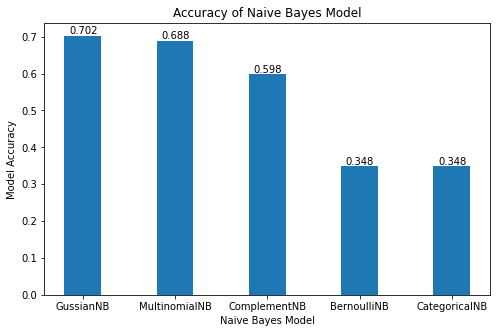

In [104]:
fig = plt.figure(figsize = (8, 5))
bars = plt.bar(modelName, modelAccuracy, width=0.4)
plt.xlabel("Naive Bayes Model")
plt.ylabel("Model Accuracy")
plt.title("Accuracy of Naive Bayes Model")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.05, yval + .005, yval)

Support Vector Machine

In [142]:
trainAcc = []
testAcc = []

for degree in range(1,11):
    svm =svm.SVC(degree=degree)
    svm.fit(dataTrain, classTrain)

    testAcc.append(predict(svm, dataTest, classTest))
    trainAcc.append(predict(svm, dataTrain, classTrain))
    
    print(degree)

AttributeError: 'SVC' object has no attribute 'SVC'

In [ ]:
degree = list(range(1,11))

plt.plot(degree,trainAcc,'-',k,testAcc,'-')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.title("Degree vs. Accuracy")
plt.xlabel('Degree')
plt.ylabel('Accuracy')